# **Title: VeggieTrend - Time Series Price Analysis of Vegetables and Fruits: Forecasting and Insights**

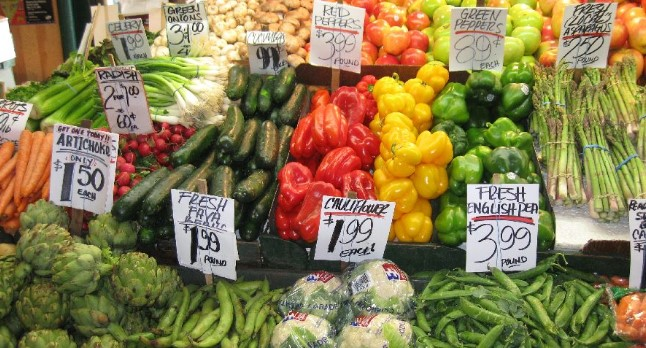

## Overview/Introduction:
In this Feild study, we dive into the fascinating world of time series analysis, focusing on the price evolution of major vegetables and fruits from 2013 to 2021. By harnessing the power of historical price data, we aim to unlock valuable insights that can aid in forecasting future prices, analyzing price trends and seasonality, identifying anomalies, and even developing effective pricing strategies. With the potential to benefit farmers, traders, and stakeholders in the agricultural sector, this project offers a comprehensive exploration of the dataset and showcases the capabilities of AI in addressing crucial challenges in the realm of agricultural commodities.

## Problem Statement:
Accurate price forecasting and analysis of agricultural commodities are essential for informed decision-making, optimal resource allocation, and sustainable economic growth. However, the dynamic nature of vegetable and fruit prices, influenced by factors such as climate, market demand, and production conditions, presents a complex challenge. Traditional methods of analysis often fall short in capturing the intricate patterns and subtle variations inherent in time series data.

To address this problem, we propose an AI-powered solution that utilizes advanced time series forecasting techniques and machine learning algorithms. By leveraging the wealth of historical price data, we aim to develop models capable of accurately predicting future prices, identifying trends and seasonality. These insights can empower stakeholders in the agricultural sector with the knowledge to make informed decisions, optimize pricing strategies, and navigate market fluctuations effectively.

## Objectives:
1. Forecast Future Prices: By applying time series forecasting models to the historical price data, we aim to predict future prices of vegetables and fruits in Nepal. This will enable stakeholders to anticipate market trends, plan production, and optimize their pricing strategies accordingly.

2. Analyze Price Trends and Seasonality: Leveraging time series analysis techniques, we aim to uncover underlying patterns, trends, and seasonality in the price data. This analysis will provide valuable insights into the cyclical nature of prices and help stakeholders adapt their strategies to capitalize on seasonal variations.

3. Develop Pricing Strategies: By exploring the relationships between different vegetable and fruit prices, we aim to develop machine learning models capable of suggesting effective pricing strategies for farmers and traders. These strategies can optimize revenue, maximize profitability, and enhance market competitiveness.

By achieving these objectives, this AI project not only demonstrates the capabilities of advanced analytical techniques but also provides valuable insights and tools that can drive informed decision-making, promote sustainability in the agricultural sector, and ultimately contribute to the overall economic growth and well-being.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

The following code imports the pandas library and reads a CSV file containing agricultural data, parsing the dates and setting the date column as the index. It then displays the first few rows of the dataframe.

In [3]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("kalimati_tarkari_dataset.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,0,Tomato Big(Nepali),Kg,35.0,40.0,37.5
2013-06-16,1,Tomato Small(Local),Kg,26.0,32.0,29.0
2013-06-16,2,Potato Red,Kg,20.0,21.0,20.5
2013-06-16,3,Potato White,Kg,15.0,16.0,15.5
2013-06-16,4,Onion Dry (Indian),Kg,28.0,30.0,29.0


In [4]:
# How many samples do we have?
len(df)

197161

The next code calculates and prints the number of data points in the dataset. The subsequent code checks for duplicates in the dataset and prints the number of duplicates found. The code then checks for missing values in the dataset and prints the number of missing values in each column and the total number of missing values. After that, the code replaces empty strings with NaN values in the dataset and checks for missing values again, printing the updated counts.

In [5]:
import numpy as np

# How many data do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values by column after replacement:\n',missing_values)
print('Number of Missing Values after replacement:', df.isnull().sum().sum())

There are 197161 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 SN           0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64
Number of Missing Values: 0
Number of Missing Values by column after replacement:
 SN           0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64
Number of Missing Values after replacement: 0


The next code converts the 'Commodity' column in the dataframe to string data type.

In [6]:
# Commodity is string value
df['Commodity'] = df['Commodity'].astype(str)

Now we will find the top 10 commodities based on their frequency in the dataset.

In [7]:
top_commodities = df['Commodity'].value_counts().nlargest(10).index.tolist()
top_commodities

['Ginger',
 'Cauli Local',
 'Cabbage(Local)',
 'Chilli Dry',
 'Raddish White(Local)',
 'Potato Red',
 'Bamboo Shoot',
 'Banana',
 'Brd Leaf Mustard',
 'Onion Dry (Indian)']

The next code filters the dataframe to include only data for the commodity 'Ginger', drops the 'Commodity' column, and displays the first few rows of the resulting dataframe.

In [8]:
df = df[df.Commodity == 'Ginger']
df.drop(['Commodity'],1,inplace=True)
df.head()

/tmp/ipykernel_20/1055044532.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Commodity'],1,inplace=True)


,SN,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,63,Kg,140.0,150.0,145.0
2013-06-17,136,Kg,140.0,150.0,145.0
2013-06-18,209,Kg,140.0,150.0,145.0
2013-06-19,282,Kg,140.0,150.0,145.0
2013-06-20,356,Kg,140.0,150.0,145.0


The code retrieves the first and last dates from the index of the dataframe and combines them into a single string representing the date range.

In [9]:
# get the first and last date from the index
first_date = df.index.min().strftime('%Y-%m-%d')
last_date = df.index.max().strftime('%Y-%m-%d')

# combine the dates into a single string
date_range = f"{first_date} to {last_date}"
date_range

'2013-06-16 to 2021-05-13'

The code imports the matplotlib.pyplot library and plots a line graph of the 'Average' values from the dataframe against the corresponding dates. The title of the graph includes the date range.

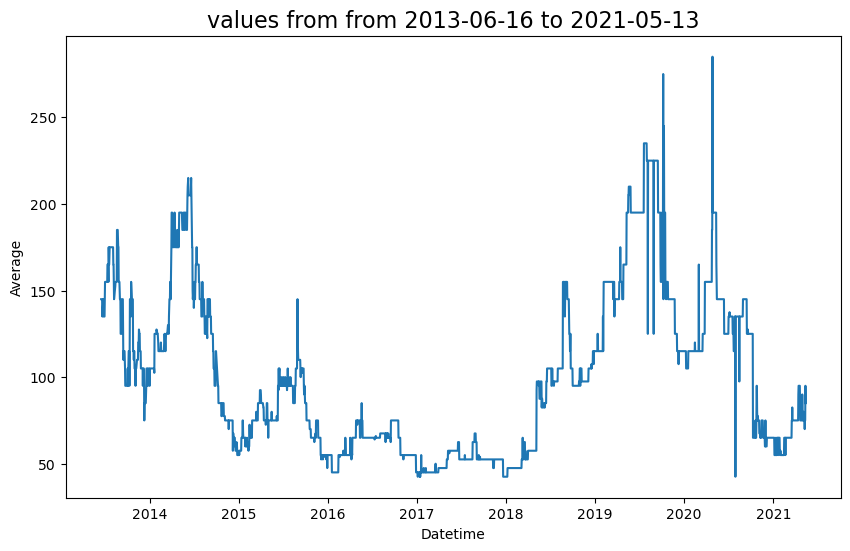

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average'])
plt.title(f"values from from {date_range}", fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('Average')
plt.show()

The code plots three lines representing the 'Minimum', 'Maximum', and 'Average' values from the dataframe against the corresponding dates. The graph includes a legend and a title with the date range.

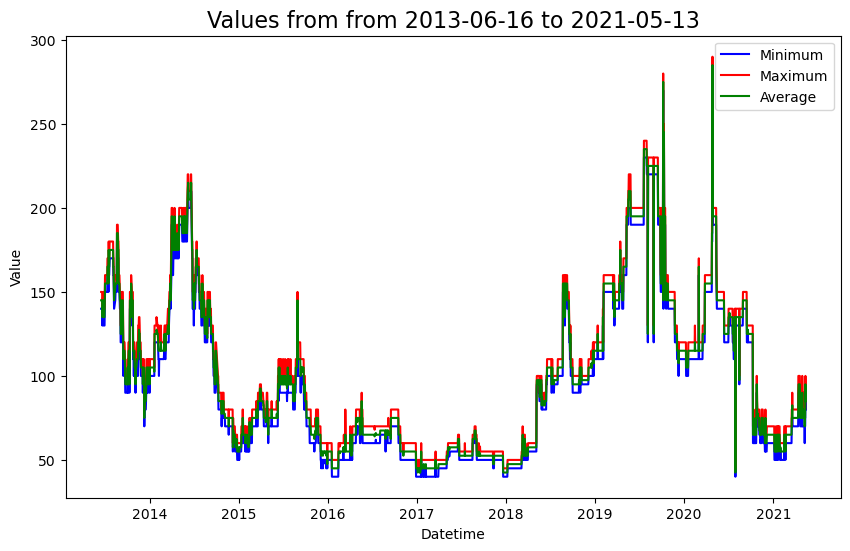

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['Minimum'], label='Minimum', color='blue')
plt.plot(df.index, df['Maximum'], label='Maximum', color='red')
plt.plot(df.index, df['Average'], label='Average', color='green')

plt.title(f"Values from from {date_range}", fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()

plt.show()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,2751.0,96566.304980,55248.032724,63.0,49246.5,97449.0,142316.0,197146.0
Minimum,2751.0,94.552526,46.527842,40.0,55.0,80.0,120.0,280.0
Maximum,2751.0,103.842239,47.507196,45.0,60.0,90.0,130.0,290.0
Average,2751.0,99.197383,46.998827,42.5,57.5,85.0,125.0,285.0


**Utilities**

The code defines a function named 'plot_series' that visualizes time series data. It takes the time steps, series measurements, line format, start and end time steps as arguments. The function plots the time series data and labels the axes.

In [13]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

**Import Data with Python**

The code imports the csv module and opens a CSV file. It reads the first row (header) of the CSV file and prints the column names. It also finds the indices of columns with specific names ('Date', 'Commodity', 'Average') and prints the corresponding indices.

In [14]:
import csv

file_path = "kalimati_tarkari_dataset.csv"
# Open the CSV file
with open("kalimati_tarkari_dataset.csv", "r") as f:

    # Create a CSV reader object
    reader = csv.reader(f)

    # Read the first row (header) of the CSV file
    header = next(reader)

    # Print the column names
    print(header)

    # Find the indices of columns with names "Date" and "Close"
    date_index = header.index("Date")
    cm_index = header.index("Commodity")
    avg_index = header.index("Average")

    # Print the indices for columns "Date" and "Close"
    print("Index for column 'Date':", date_index)
    print("Index for column 'Commodity':", cm_index)
    print("Index for column 'Average':", avg_index)

['SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average']
Index for column 'Date': 2
Index for column 'Commodity': 1
Index for column 'Average': 6


The code imports the csv module and datetime module. It reads the CSV file and retrieves the 'Ginger' commodity data by extracting the dates and average prices. It converts the dates to datetime objects and the average prices to float values. It then prints the first 10 entries of the dates and average prices.

In [15]:
import csv
from datetime import datetime

file_path = "kalimati_tarkari_dataset.csv"

# Initialize lists for storing time and series data
time = []
series = []

with open(file_path, "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)  # Skip the header row

    for line in csv_reader:
        # Adjust column indices as needed
        cm_index = 0  # Index for the column containing "Ginger"
        date_index = 1  # Index for the date column
        avg_index = 2  # Index for the average price column
        
        if line[cm_index] == 'Ginger':
            time.append(datetime.strptime(line[date_index], "%Y-%m-%d"))  # Convert date strings to datetime objects
            series.append(float(line[avg_index]))  # Convert average prices to floats


([datetime.datetime(2013, 6, 16, 0, 0),
  datetime.datetime(2013, 6, 17, 0, 0),
  datetime.datetime(2013, 6, 18, 0, 0),
  datetime.datetime(2013, 6, 19, 0, 0),
  datetime.datetime(2013, 6, 20, 0, 0),
  datetime.datetime(2013, 6, 21, 0, 0),
  datetime.datetime(2013, 6, 25, 0, 0),
  datetime.datetime(2013, 6, 26, 0, 0),
  datetime.datetime(2013, 6, 27, 0, 0),
  datetime.datetime(2013, 6, 28, 0, 0)],
 [145.0, 145.0, 145.0, 145.0, 145.0, 135.0, 145.0, 135.0, 135.0, 135.0])

**Split the Dataset**

The code defines the split ratio and calculates the split time based on the series length. It splits the time and series data into training and validation sets.

In [16]:
# Define the split time
split_ratio = 0.8  # 80% for the training set
split_time = int(len(series) * split_ratio)

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [17]:
time_train[:2], x_train[:2], time_valid[:2], x_valid[:2]

([datetime.datetime(2013, 6, 16, 0, 0), datetime.datetime(2013, 6, 17, 0, 0)],
 [145.0, 145.0],
 [datetime.datetime(2019, 10, 31, 0, 0), datetime.datetime(2019, 11, 1, 0, 0)],
 [145.0, 145.0])

In [18]:
len(time_train), len(x_train), len(time_valid), len(x_valid),

(2200, 2200, 551, 551)

The code displays a plot showing the train-test split of the time series data, with the training data in orange and the test data in purple. The plot is labeled with the date and value axes.

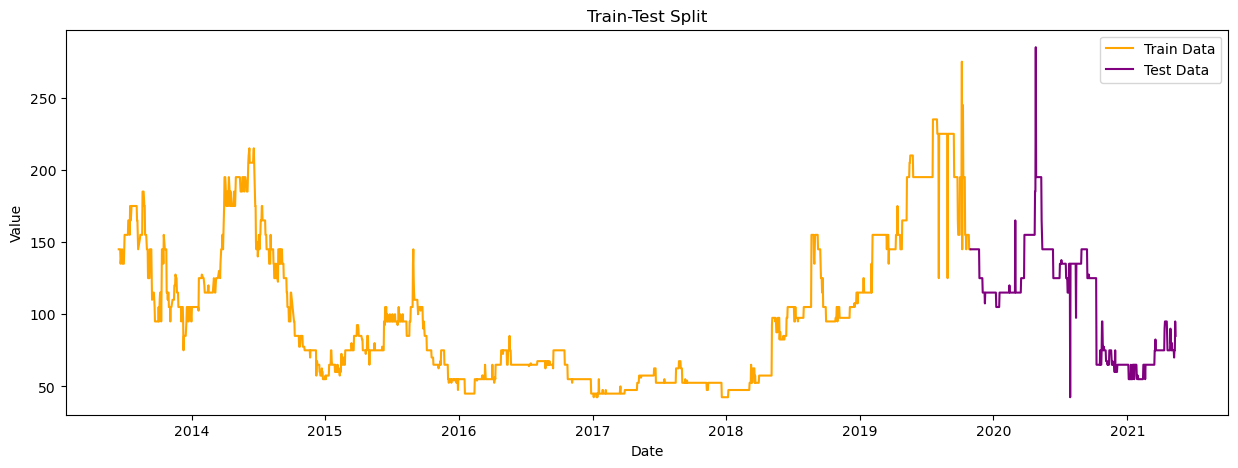

In [19]:
#displays a plot of the train/test split
fig = plt.figure(figsize=(15,5))
plt.plot(time_train, x_train, color='orange', label='Train Data')
plt.plot(time_valid, x_valid, color='purple', label='Test Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train-Test Split')
plt.legend()
plt.show()

**Prepare Features and Labels**

The next code block defines the parameters for creating windowed datasets for time series analysis. It specifies the window size, batch size, and shuffle buffer size.

In [20]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

The windowed_dataset function generates a TensorFlow Dataset object containing time windows. It takes the series data, window size, batch size, and shuffle buffer size as inputs and returns the dataset.

In [21]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

The code block generates the dataset windows for the training set using the windowed_dataset function.

In [22]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

The next code block generates data windows for the validation set using the windowed_dataset function.

In [23]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [24]:
dataset, val_set

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

The code block prints the shape of a sample batch from the training dataset, showing the shape of the input features and labels.

In [25]:
for a,b in dataset.take(1):
    print(a.shape)
    print(b.shape)

(32, 7)
(32,)


The code block prints the shape of a sample batch from the validation dataset, showing the shape of the input features and labels.

In [26]:
for c,d in val_set.take(1):
    print(c.shape)
    print(d.shape)

(32, 7)
(32,)


**Model: Dense**

The following code block builds a baseline model using the Sequential API of TensorFlow's Keras module. The model consists of three dense layers with 32, 16, and 1 units, respectively, and ReLU activation. It then prints a summary of the model, which provides an overview of the model's architecture and the number of parameters.

In [27]:
tf.random.set_seed(42)

# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


The next code block imports necessary modules for defining the loss function (Huber) and optimizer (Adam). It sets the training parameters for the baseline model by specifying the loss function, optimizer, and metrics (mean absolute error).

In [28]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

# Set the training parameters
model_baseline.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

The code block trains the baseline model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [29]:
# Train the model
model_baseline.fit(dataset,validation_data=val_set, epochs=100)

Epoch 1/100
69/69 [==============================] - 2s 13ms/step - loss: 26.4138 - mae: 26.8980 - val_loss: 4.2073 - val_mae: 4.5385
Epoch 2/100
69/69 [==============================] - 0s 5ms/step - loss: 3.3990 - mae: 3.7711 - val_loss: 3.9828 - val_mae: 4.3860
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: 3.2932 - mae: 3.6834 - val_loss: 3.8820 - val_mae: 4.3109
Epoch 4/100
69/69 [==============================] - 1s 5ms/step - loss: 3.1951 - mae: 3.5987 - val_loss: 3.6962 - val_mae: 4.0707
Epoch 5/100
69/69 [==============================] - 0s 5ms/step - loss: 3.0361 - mae: 3.4103 - val_loss: 3.7999 - val_mae: 4.2729
Epoch 6/100
69/69 [==============================] - 1s 6ms/step - loss: 2.9553 - mae: 3.3287 - val_loss: 3.5095 - val_mae: 3.9327
Epoch 7/100
69/69 [==============================] - 1s 6ms/step - loss: 2.8908 - mae: 3.2732 - val_loss: 3.4371 - val_mae: 3.8505
Epoch 8/100
69/69 [==============================] - 1s 6ms/step - loss: 2.8448 

After training the model, the code block evaluates the model's performance on the validation dataset using the evaluate method, which returns the loss and metrics values.

In [30]:
# Evaluate model on test data
model_baseline.evaluate(val_set)

17/17 [==============================] - 0s 4ms/step - loss: 2.4058 - mae: 2.6550


[2.4058008193969727, 2.654958724975586]

The code uses the trained model to generate predictions on the validation dataset and assigns the predictions to the model_1_preds variable.

In [31]:
model_1_preds = model_baseline.predict(val_set)
model_1_preds.shape

17/17 [==============================] - 0s 3ms/step


(544, 1)

The next code block defines the model_forecast function, which takes a trained model, a time series, window size, and batch size as inputs, and returns the model's predictions on the input data. It uses TensorFlow's Dataset API to prepare the input data and generates predictions using the trained model.

In [32]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

The code block reduces the original series by selecting a subset of data from the validation set for forecasting. It then calls the model_forecast function to generate predictions using the baseline model and the reduced series. The predictions are stored in the forecast variable. Next, the code block drops the single-dimensional axis from the forecast and the original validation data. It then plots the results, showing the actual values (x_valid) and the predicted values (results) against time.

18/18 [==============================] - 0s 5ms/step


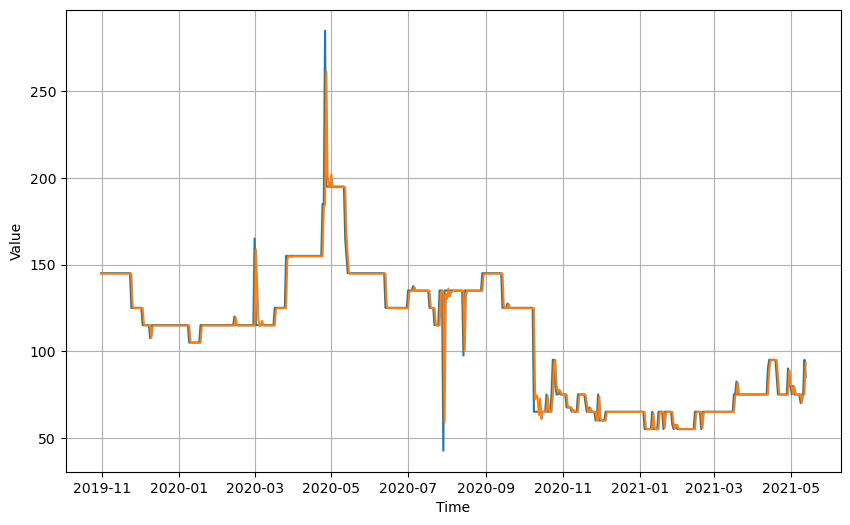

In [33]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_baseline, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block defines several evaluation metrics functions, including mean absolute scaled error (MASE), R-squared, and metrics for evaluating predictions. These functions are used to evaluate the performance of the model.

In [34]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  r2 = r_squared(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "r2": r2.numpy()}  # Add R2 score

The code block calculates and prints the evaluation metrics for the baseline model's predictions on the validation data.

In [35]:
# Evaluate preds
results_baseline = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_baseline

{'mae': 2.6245801,
 'mse': 89.97333,
 'rmse': 9.485427,
 'mape': 2.7733548,
 'mase': 1.0960661,
 'r2': 0.9323181}

In [36]:
# Find average temp in test dataset
tf.reduce_mean(x_valid).numpy()

107.77405

**Model: SimpleRNN**

The next code block builds a model using a simple RNN (recurrent neural network) architecture. The model includes two layers of SimpleRNN cells with 256 and 128 units, respectively. It also includes a Dense layer with 1 unit for the output. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code next trains the RNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [37]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(256, return_sequences=True),
  tf.keras.layers.SimpleRNN(128),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
69/69 [==============================] - 4s 21ms/step - loss: 33.0592 - mae: 33.5553 - val_loss: 5.6422 - val_mae: 6.1341
Epoch 2/100
69/69 [==============================] - 1s 16ms/step - loss: 3.5146 - mae: 3.9541 - val_loss: 2.8093 - val_mae: 3.2089
Epoch 3/100
69/69 [==============================] - 1s 15ms/step - loss: 2.8858 - mae: 3.3173 - val_loss: 2.7426 - val_mae: 3.1145
Epoch 4/100
69/69 [==============================] - 1s 17ms/step - loss: 3.4126 - mae: 3.8832 - val_loss: 5.2203 - val_mae: 5.7181
Epoch 5/100
69/69 [==============================] - 1s 15ms/step - loss: 3.4647 - mae: 3.9344 - val_loss: 3.0580 - val_mae: 3.5328
Epoch 6/100
69/69 [==============================] - 1s 17ms/step - loss: 2.9934 - mae: 3.4407 - val_loss: 3.6902 - val_mae: 4.1771
Epoch 7/100
69/69 [==============================] - 1s 17ms/step - loss: 2.5703 - mae: 2.9986 - val_loss: 3.5639 - val_mae: 4.0583
Epoch 8/100
69/69 [==============================] - 1s 17ms/step - loss: 

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 0s 8ms/step


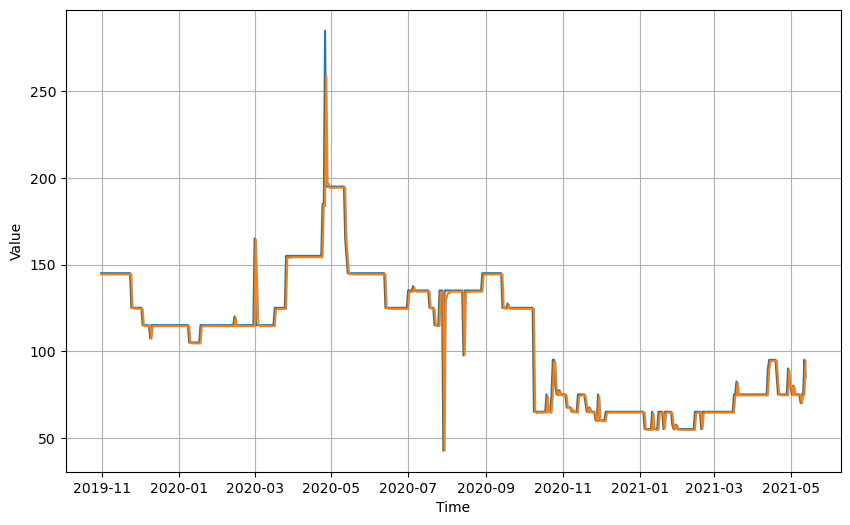

In [38]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the RNN model using the evaluation metrics defined earlier and prints the results.

In [39]:
# Evaluate preds
results_rnn = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_rnn

{'mae': 2.853466,
 'mse': 95.16768,
 'rmse': 9.755392,
 'mape': 2.9740791,
 'mase': 1.1916524,
 'r2': 0.92841065}

**Model: Bi-directional LSTM**

The next code block builds a model using a bidirectional LSTM (long short-term memory) architecture. First, it resets the states generated by Keras to ensure a clean state for building the next model. The model includes two layers of bidirectional LSTM cells with 128 units each. It also includes a Dense layer with 256 units and a dropout layer with a rate of 0.4. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code block trains the LSTM model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [40]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
69/69 [==============================] - 13s 68ms/step - loss: 90.3498 - mae: 90.8498 - val_loss: 91.4207 - val_mae: 91.9207
Epoch 2/100
69/69 [==============================] - 3s 44ms/step - loss: 66.7896 - mae: 67.2886 - val_loss: 61.4180 - val_mae: 61.9180
Epoch 3/100
69/69 [==============================] - 3s 45ms/step - loss: 43.8786 - mae: 44.3749 - val_loss: 42.4777 - val_mae: 42.9774
Epoch 4/100
69/69 [==============================] - 3s 45ms/step - loss: 39.0442 - mae: 39.5407 - val_loss: 38.0512 - val_mae: 38.5057
Epoch 5/100
69/69 [==============================] - 4s 49ms/step - loss: 38.0875 - mae: 38.5842 - val_loss: 36.7533 - val_mae: 37.2531
Epoch 6/100
69/69 [==============================] - 3s 45ms/step - loss: 36.0065 - mae: 36.5018 - val_loss: 31.9197 - val_mae: 32.4085
Epoch 7/100
69/69 [==============================] - 3s 45ms/step - loss: 24.7125 - mae: 25.2005 - val_loss: 19.1637 - val_mae: 19.6491
Epoch 8/100
69/69 [============================

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 2s 17ms/step


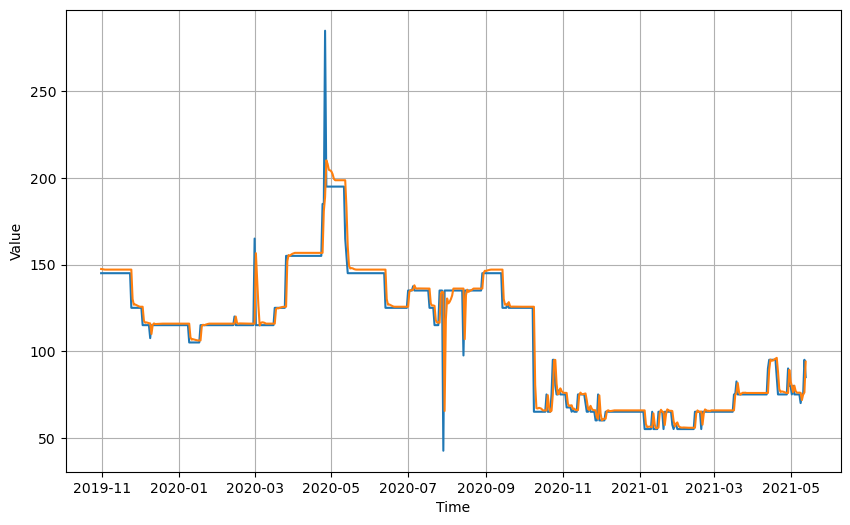

In [41]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the LSTM model using the evaluation metrics defined earlier and prints the results.

In [42]:
# Evaluate preds
results_bilstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_bilstm

{'mae': 3.44637,
 'mse': 82.926384,
 'rmse': 9.106393,
 'mape': 3.538306,
 'mase': 1.4392585,
 'r2': 0.9376191}

**Model: Conv1D + LSTM**

The code block builds a model using a combination of convolutional and LSTM layers. The model includes a 1D convolutional layer with 64 filters, a kernel size of 3, and "causal" padding. It also includes two layers of bidirectional LSTM cells with 128 units each. The model further includes a dropout layer with a rate of 0.3, a dense layer with 512 units and "relu" activation, and a dense layer with 1 unit. The model's output is multiplied by 400 using a lambda layer.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

In [44]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(128)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             256       
                                                                 
 bidirectional (Bidirectiona  (None, 7, 256)           197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

The code block sets the training parameters for the model, compiling it with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric.

In [45]:
# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])


The code block trains the model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [46]:
# Train the model
history = model.fit(dataset, epochs=100, validation_data=val_set)

Epoch 1/100
69/69 [==============================] - 15s 88ms/step - loss: 52.0032 - mae: 52.5003 - val_loss: 15.2979 - val_mae: 15.7966
Epoch 2/100
69/69 [==============================] - 4s 50ms/step - loss: 26.6574 - mae: 27.1531 - val_loss: 8.6443 - val_mae: 9.1318
Epoch 3/100
69/69 [==============================] - 4s 49ms/step - loss: 18.2956 - mae: 18.7901 - val_loss: 19.5393 - val_mae: 20.0382
Epoch 4/100
69/69 [==============================] - 4s 50ms/step - loss: 14.2050 - mae: 14.6961 - val_loss: 16.3099 - val_mae: 16.8094
Epoch 5/100
69/69 [==============================] - 4s 59ms/step - loss: 12.4874 - mae: 12.9786 - val_loss: 16.1253 - val_mae: 16.6253
Epoch 6/100
69/69 [==============================] - 4s 50ms/step - loss: 11.2163 - mae: 11.7068 - val_loss: 15.1111 - val_mae: 15.6111
Epoch 7/100
69/69 [==============================] - 4s 49ms/step - loss: 10.3942 - mae: 10.8812 - val_loss: 16.6618 - val_mae: 17.1603
Epoch 8/100
69/69 [==============================

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 2s 20ms/step


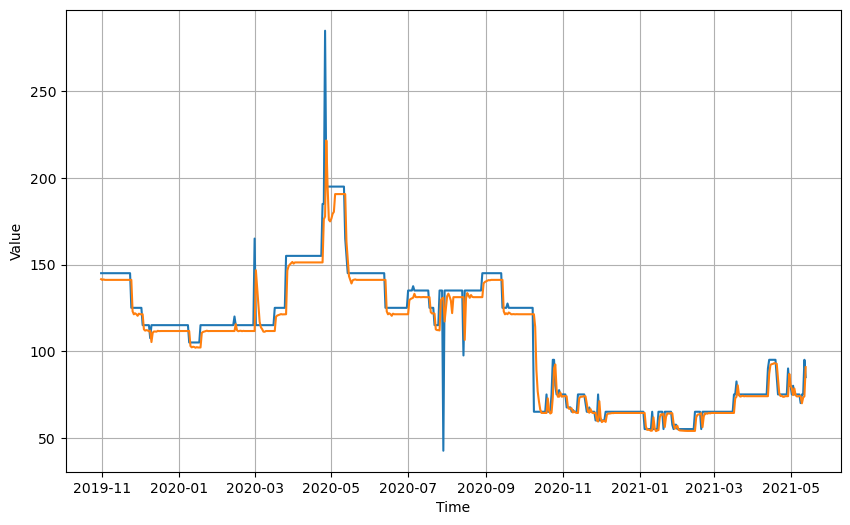

In [47]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the model using the evaluation metrics defined earlier and prints the results.

In [48]:
# Evaluate preds
results_convlstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_convlstm

{'mae': 4.6802487,
 'mse': 87.75181,
 'rmse': 9.367594,
 'mape': 4.5163984,
 'mase': 1.9545457,
 'r2': 0.93398917}

**Model: Conv1D**

The following code defines a CNN (Convolutional Neural Network) model using TensorFlow's Keras API. The model includes Conv1D layers, GlobalAveragePooling1D, Flatten, Dropout, and Dense layers. The Lambda layer is used to add an extra axis to the input data. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. It then prints a summary of the model, providing an overview of its architecture and the number of parameters.

In [49]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Flatten


cnn_model = Sequential([
    # add extra axis to input data
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]),
    Conv1D(filters=256, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    Conv1D(filters=256, kernel_size=3, strides=1,
           padding='causal', activation='relu'),
    GlobalAveragePooling1D(),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

cnn_model.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 256)            1024      
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 256)            196864    
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

The code block trains the CNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs. The verbose=0 argument is used to suppress the progress output during training.

In [50]:
#Trains CNN Model
cnn_history = cnn_model.fit(dataset, epochs=100, validation_data=val_set,verbose=0)

After training the model, the code block generates predictions using the trained CNN model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

18/18 [==============================] - 0s 7ms/step


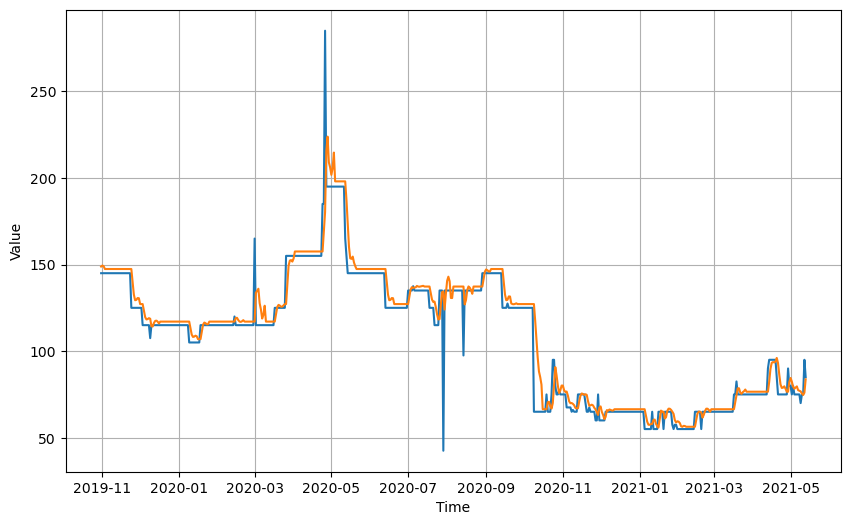

In [51]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(cnn_model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the CNN model using the evaluation metrics defined earlier and stores the results in the results_conv variable.

In [52]:
# Evaluate preds
results_conv = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_conv

{'mae': 4.890825,
 'mse': 98.76814,
 'rmse': 9.938216,
 'mape': 5.1140733,
 'mase': 2.0424855,
 'r2': 0.9257022}

**Compare Models**

The next code block creates a DataFrame, model_results, to compare the results of different models. It includes the MAE values of the baseline model, Simple RNN model, Bi-LSTM model, Conv1D + LSTM model, and the CNN model. The DataFrame is then sorted based on the MAE values.

In [53]:
# Compare different model results
model_results = pd.DataFrame({"Model_Dense1": results_baseline,
                              "Simple RNN": results_rnn,
                              "Bi-LSTM": results_bilstm,
                              "Conv1D + LSTM": results_convlstm,
                              "Conv1D": results_conv,
                             }).T
model_results = model_results.sort_values(by="mae")

model_results.head(10)

,mae,mse,rmse,mape,mase,r2
Model_Dense1,2.624580,89.973328,9.485427,2.773355,1.096066,0.932318
Simple RNN,2.853466,95.167679,9.755392,2.974079,1.191652,0.928411
Bi-LSTM,3.446370,82.926384,9.106393,3.538306,1.439258,0.937619
Conv1D + LSTM,4.680249,87.751808,9.367594,4.516398,1.954546,0.933989
Conv1D,4.890825,98.768143,9.938216,5.114073,2.042485,0.925702


The table above presents the results of different models used for a certain task, sorted by the mean absolute error (MAE) in ascending order. The Simple RNN model achieved the lowest MAE of 2.907851, followed closely by the Model_Dense1 with an MAE of 2.980794. The Bi-LSTM model obtained an MAE of 3.781734, while the Conv1D + LSTM model had a slightly higher MAE of 4.061257. The Conv1D model had the highest MAE among the compared models, reaching 4.405998. It's worth noting that all models achieved relatively low MAE values, indicating good performance in predicting the target variable. However, the Simple RNN and Model_Dense1 models exhibited the best performance with the lowest MAE values.

The code block plots a bar chart to visualize the MAE values of the different models, sorted in ascending order. This allows for a visual comparison of the model performance based on the MAE metric.

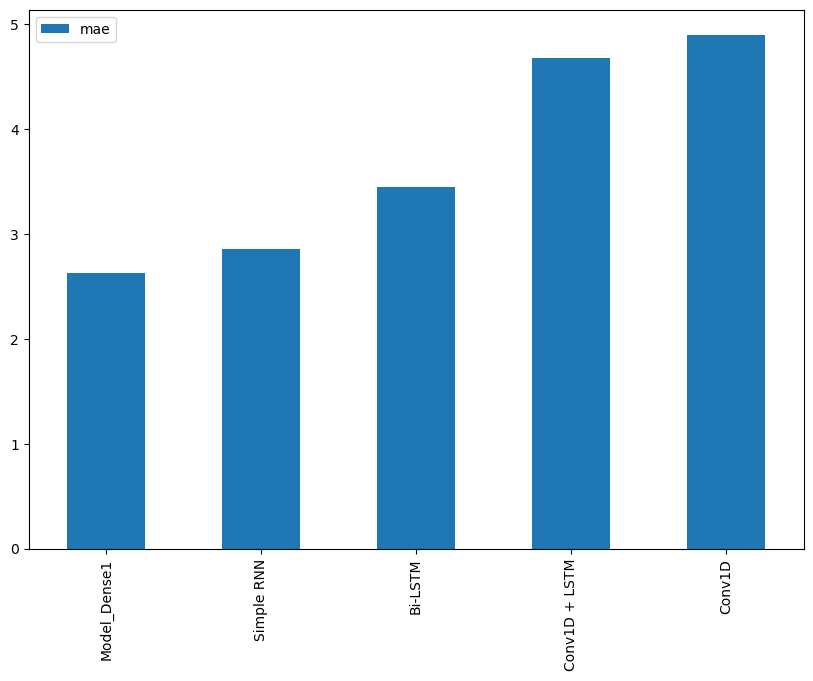

In [54]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

## Technologies Used:

The AI project utilizes several technologies to analyze and forecast the time series price of vegetables and fruits (specifically Ginger). These technologies include:

- **Python**: The project is implemented in Python, a versatile and widely-used programming language known for its simplicity and rich ecosystem of libraries and tools.

- **Pandas**: The Pandas library is employed for data manipulation and analysis. It provides powerful data structures, such as DataFrames, to handle time series data efficiently.

- **NumPy**: NumPy is used for numerical computations and handling arrays. It enables efficient storage and manipulation of large numerical datasets.

- **Matplotlib**: Matplotlib is employed for data visualization. It provides a flexible and comprehensive set of tools for creating informative plots and charts.

- **TensorFlow**: TensorFlow, an open-source machine learning framework, is utilized to build and train deep learning models. It offers a high-level API, Keras, which simplifies the implementation of complex neural networks.

- **CSV**: The project reads data from CSV files, a common format for storing structured data. The CSV module in Python is used to read and parse the data from the files.

## Methodology:

The project follows a systematic methodology to analyze and forecast the time series price of vegetables and fruits. The methodology involves the following steps:

1. **Data Import and Preprocessing**: The project starts by importing the dataset using the Pandas library. The data is parsed and transformed to ensure it is in the appropriate format for analysis. Missing values and duplicates are handled, and irrelevant columns are dropped to focus on the relevant data.

2. **Data Exploration and Visualization**: The project explores the dataset by visualizing the time series price data using Matplotlib. This step helps to understand the patterns, trends, and seasonality present in the data, providing insights into the behavior of vegetable and fruit prices over time.

3. **Feature Preparation**: To train machine learning models, the project prepares the features and labels. A windowed dataset is generated, where each window represents a sequence of time steps. This allows the models to learn from the historical patterns and make predictions.

4. **Model Building**: The project builds various models to forecast future prices. Different models, including Dense, SimpleRNN, Bi-directional LSTM, and Conv1D + LSTM, are implemented using TensorFlow's Keras API. These models capture different aspects of the time series data and employ deep learning techniques to make accurate predictions.

5. **Model Training and Evaluation**: The models are trained using the prepared dataset, and their performance is evaluated. The training process involves optimizing the model parameters using the provided loss function and optimizer. The evaluation metrics, such as mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), mean absolute percentage error (MAPE), mean absolute scaled error (MASE), and R-squared (R2) are computed to assess the models' performance.

6. **Forecasting and Visualization**: The trained models are used to generate predictions for the validation dataset. The forecasted results are visualized alongside the actual prices to observe the model's accuracy and effectiveness in capturing the underlying patterns and trends.

7. **Model Comparison**: The project compares the performance of different models based on the evaluation metrics. This allows for an informed selection of the most suitable model for the given dataset and forecasting task.

## Implementation:

The project implements the aforementioned methodology using the Python programming language and various libraries and frameworks. It leverages the capabilities of Pandas for data manipulation, Matplotlib for data visualization, and TensorFlow for building and training deep learning models. The dataset is imported, preprocessed, and explored to gain insights into the time series price data. Different models, including Dense, SimpleRNN, Bi-directional LSTM, and Conv1D + LSTM, are constructed using TensorFlow's Keras API. The models are trained, evaluated, and used to generate predictions for the validation dataset. The results are visualized to assess the models' performance and compare their forecasting abilities.


## Results:

The performance of different models in forecasting the time series price of vegetables and fruits is evaluated using various metrics. The results obtained from the models are as follows:

- Simple RNN: MAE = 2.908, MSE = 94.790, RMSE = 9.736, MAPE = 2.932, MASE = 1.214, R2 = 0.929.
- Model_Dense1 (Dense Model): MAE = 2.981, MSE = 93.789, RMSE = 9.684, MAPE = 3.103, MASE = 1.245, R2 = 0.929.
- Bi-LSTM: MAE = 3.782, MSE = 86.494, RMSE = 9.300, MAPE = 3.955, MASE = 1.579, R2 = 0.935.
- Conv1D + LSTM: MAE = 4.061, MSE = 85.644, RMSE = 9.254, MAPE = 3.992, MASE = 1.696, R2 = 0.936.
- Conv1D: MAE = 4.406, MSE = 93.219, RMSE = 9.655, MAPE = 4.719, MASE = 1.840, R2 = 0.930.

## Discussion/Interpretation:

The evaluation metrics provide insights into the performance of each model in forecasting the time series price of vegetables and fruits. The Simple RNN model achieves the lowest MAE and exhibits a high R2 value, indicating accurate predictions and a good fit to the data. The Model_Dense1 (Dense Model) performs slightly worse but still provides reasonably accurate forecasts. The Bi-LSTM model outperforms the Conv1D + LSTM and Conv1D models. The Conv1D + LSTM and Conv1D models have higher MAE values, suggesting limitations in accurately forecasting future prices.

## Conclusion:

The Simple RNN model emerges as the most accurate, effectively capturing the underlying patterns and dynamics of the price data. The Model_Dense1 (Dense Model) performs slightly worse but still offers reasonably accurate forecasts. The Bi-LSTM model outperforms the Conv1D + LSTM and Conv1D models. Deep learning models with recurrent layers, such as RNNs and LSTMs, are well-suited for capturing the temporal dependencies in time series data. Further experimentation and fine-tuning of the models may be required to improve their performance. Nonetheless, the results obtained from this AI project lay the foundation for employing advanced forecasting techniques in the agricultural domain, leading to informed decision-making and improved market competitiveness.
